# __PageRank and renewal processes__

In [1]:
import networkx as nx
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.animation
from IPython.display import HTML
import pandas as pd

__PageRank__

PageRank was introduced by the founders of Google to rank websites in search results. PageRank is a way of measuring the importance of website pages. According to Google:


_PageRank works by counting the number and quality of links to a page to determine a rough estimate of how important the website is. The underlying assumption is that more important websites are likely to receive more links from other websites_

__PageRank random walk__

The following figures are from the slides of the course called Introduction to Data Science I held by Roland Molontay.

__Simple random walk on graphs:__

![random_walk_transition_prob_matrix](http://math.bme.hu/~marcessz/notebooks/random_walk_transition_prob.PNG)

![sink nodes](http://math.bme.hu/~marcessz/notebooks/sink_nodes.PNG)

The __PageRank__ is a modified random walk:
1. It handles the sink nodes
2. Ensures irreducibility with random jumps

![sink nodes_2](http://math.bme.hu/~marcessz/notebooks/sink_nodes_2.PNG)

![pagerank](http://math.bme.hu/~marcessz/notebooks/page_rank.PNG) 

* PageRank of each node is the corresponding entry in the stationary
distribution of PageRank random walk (driven by P’’ matrix)
* It is the visit frequency of the PageRank random walk on the web graph

# __Exercise 1__

Implement a function called ```google_matrix```, which has two parameters: a graph, and an $\alpha$ constant (called damping factor). This function should return the $P''$ transition probability matrix, that is calculated as follows:
1. First modify the adjacency matrix of the graph. If there exist somes node with no outlinks (dangling/sink nodes), then it means that the row of these nodes contains only zeros in the $A$ adjacency matrix. Calculate $A'$, which is the same as $A$ except for the rows of the dangling nodes: in the rows of the dangling nodes replace the zeros to ones. <br> 

2. Normalize the rows of $A'$, i.e. calculate $P' := D^{-1}A'$, where $(D^{-1})_{i,i} = 1/\sum_{j=1}^n {A'}_{i, j}$, and $n$ is the size (number of nodes) of the graph.  ($\sum_{j=1}^n {A'}_{i, j}$ is the sum of the $i$th row in $A'$). 

3. Calculate and return $P''$:
$$P'' = \alpha P' + (1-\alpha) \frac{1}{n} E $$
where $E$ is a matrix of all ones.  

Built-in function that you will have to use:
* [nx.to_numpy_array](https://networkx.github.io/documentation/latest/reference/generated/networkx.convert_matrix.to_numpy_array.html): Returns the adjacency matrix as a numpy array
* [np.sum](https://docs.scipy.org/doc/numpy/reference/generated/numpy.sum.html) or array.sum(), where array is a numpy array: Sum of array elements over a given axis. Axis=1: rows, axis=0: columns.
* [np.diag](https://docs.scipy.org/doc/numpy/reference/generated/numpy.diag.html): construct a diagonal matrix.
* [np.dot](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.dot.html): matrix multiplication. 
* [np.where](https://docs.scipy.org/doc/numpy/reference/generated/numpy.where.html): See example below. 
* [np.ones](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ones.html): return an array of given shape filled with ones.

__This should take you about 20 minutes!__

Hints are in the comments of the function.

__How np.where works:__

In [2]:
a = np.array([10,2,0,3,5,0])

If we want to get the indices of the elements of the ```a``` array that equal to 0, we can do the following:

In [3]:
np.where(a == 0)

(array([2, 5], dtype=int64),)

It returns a tuple, so actualy we need the first element of this tuple:

In [4]:
np.where(a == 0)[0]

array([2, 5], dtype=int64)

### __You can test your function on the following graph:__  
__Compare the output of your function to the output of [nx.google_matrix](https://networkx.github.io/documentation/networkx-1.9/reference/generated/networkx.algorithms.link_analysis.pagerank_alg.google_matrix.html)__

In [6]:
di_g = nx.DiGraph()
di_g.add_edges_from([(2, 3), (3, 2), (4, 1), (4, 2), (5, 2), (5, 4),
                    (5, 6), (6, 2), (6, 5), (7, 2), (7, 5), (8, 2),
                    (8, 5), (9, 2), (9, 5), (10, 5), (11, 5)])
dpos = {1: [0.1, 0.9], 2: [0.4, 0.8], 3: [0.8, 0.9], 4: [0.15, 0.55],
        5: [0.5,  0.5], 6: [0.8,  0.5], 7: [0.22, 0.3], 8: [0.30, 0.27],
        9: [0.38, 0.24], 10: [0.7,  0.3], 11: [0.75, 0.35]}

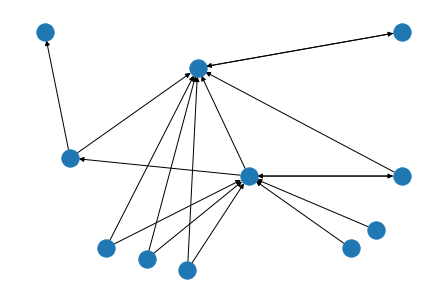

In [7]:
nx.draw(di_g, dpos)

# __Exercise 2__ 

Implement a function that calculates the pagerank of the nodes of a given graph using the power method:

__Algorithm:__

The function should have 3 input parameters: ```graph, alpha=.85, iteration=100```.
1. Initialize an $x$ pagerank vector (of lenght $n$=number of nodes) as $x=[\frac{1}{n}, \ldots, \frac{1}{n}]$. <br> Use [np.repeat](https://docs.scipy.org/doc/numpy/reference/generated/numpy.repeat.html).
2. Calculate the $P''$ transition matrix with the help of ```google_matrix``` function.
3. For i = 1, 2, $\ldots$, `iteration`:
    * $x = x\cdot P''$ <br> Use [np.dot](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.dot.html) for the multiplication.
 

Calculate the pagerank of the ```di_g``` directed graph, and compare your results to the output of [nx.pagerank(di_g)](https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.algorithms.link_analysis.pagerank_alg.pagerank.html). You can also compare the runtime of your function and the built-in networkx function (hint: https://stackoverflow.com/questions/7370801/how-to-measure-elapsed-time-in-python).

__This should take you about 10 minutes!__

---

# __Renewal processes__ 

In [13]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

__Definition__

Let $\xi_1, \xi_2, \ldots$ be i.i.d. positive random variables (i.e. $\mathbb{P}(\xi_i >0)=1$), such that $\mathbb{E}(\xi_i)<\infty$. Let $f$ be the probability density function of $\xi_i$.

Let $T_0=0$ and for each $n>0:$

$$T_n = \sum_{i=1}^n \xi_i,$$
where $T_n$ is referred to as the $n$th jump time, moreover the intervals $[T_n, T_{n+1}]$ are the _renewal intervals_.

Then the __renewal process__ $(X_t)_{t\geq 0}$ is defined as
$$X_t = \sum_{n=1}^\infty \mathbb{1}[T_n \leq t] = \sup \{n: T_n \leq t \}$$

(Sometimes the renewal process is denoted by $N_t$)

![renewal process](http://math.bme.hu/~marcessz/notebooks/renewal_process.png)

# __Exercise 3__ 

Implement a function that returns $X_t$ for a given $t$, i.e., let $t$ be the input of the function:
1. Let $\xi_i \sim \mathrm{Exp}\left(\frac{1}{2}\right)$. Generate 1000 $\xi_i$ instances. <br> Use np.random.exponential. Note that the parameter of np.random.exponential is not $\lambda$ but the expected value: $1/\lambda$ 
2. Calculate the $T_i$ jump times. <br> Use np.cumsum
3. Get the index of the interval that contains t. The index of this interval is equal to the number of jumps until time $t$, that is $X_t$. <br> Use np.searchsorted with ```side='right'```.
4. Plot $X_t$ function on the $[0,20]$ interval!
    * Create a numpy array $s$ that contains 1000 evenly spaced numbers between 0 and 20. <br> Use np.linspace
    * Plot $X(s)$ against $s$.<br> Use plt.plot
    * Set the names/labels of the axes (plt.xlabel, plt.ylabel)

__This should take you about 15 minutes!__

In [ ]:
expectation = 2

In [19]:
rvs=np.random.exponential(expectation,10)

In [20]:
rvs.mean()

1.922994494133143

# __Exercise 4a__ 

Check the statement of the following theorem:

__Theorem__

$(X_t)_{t\geq 0}$ satisfy
$$\lim_{t\to\infty} \frac{X_t}{t} = \frac{1}{\mathbb{E}(\xi_1)}$$

(The expected value of the expontential distribution with $\lambda$ parameter is $\frac{1}{\lambda}$)

1. Let $t$ be a numpy array that contains 1000 evenly spaced numbers between 1 and 1500.
2. Plot $\frac{X(t)}{t}$ against $t$:
    * Set the label to $\frac{X_t}{t}$ (```label=r'$\frac{X_t}{t}$'```)
3. Plot a horizontal line at $\frac{1}{\mathbb{E}(\xi)}$ 
    * Let the linestyle be dashed (```ls='--'```)
    * Set its color to red
    * Set the label to $1/\mathbb{E}(\xi)$

__This should take you about 10 minutes!__

In [24]:
1/expectation

0.5

In [25]:
X(100)/100

0.49

# __Exercise 4b__ 

Check the statement of the __Elementary Renewal Theorem__:

$$\lim_{t \to \infty} \frac{\mathbb{E}(X_t)}{t} = \frac{1}{\mathbb{E}(\xi)}  $$

1. Implement a function, called ```EX``` that estimates $\mathbb{E}(X_t)$:
    * Let $X$ and $t$ be the input parameters of the function
    * Create a numpy array that contains 100 realizations of $X_t$
    * Return the mean of this array
2. Let ```EX_np``` be the _vectorized_ function of ```EX```, i.e. ```EX_np = np.vectorize(EX)```. It means that we can add a numpy array as an input of ```EX_np```, i.e. <br> ```EX_np(np.array([t_1, t_2, ..., t_n])) = np.array([EX(t_1), EX(t_2), ..., EX(t_n)])```
3. Let $t$ be a numpy array that contains 100 evenly spaced numbers between 1 and 100.
4. On the same figure plot the following lines:
    * $\frac{\mathbb{E}(X_t)}{t}$ against $t$ and set its label to ```r'$\frac{\mathbb{E}(X_t)}{t}$'```
    * $\frac{X_t}{t}$ against $t$ with the same label as in the previous exercise
    * a horizontal line at $\frac{1}{\mathbb{E}(\xi)}$ with the same label and linestyle as in the previous exercise.

__This should take you about 15 minutes!__

# __Exercise 5__ 

Check the statement of the __Blackwell Renewal Theory__:

$$\lim_{t \to \infty} \mathbb{E}(X_{t+h} - X_t) = \frac{h}{\mathbb{E}(\xi)}  $$

Now let $\xi_i \sim \mathrm{Uni}(\mu - 0.5, \mu + 0.5)$, i.e. $\mathbb{E}(\xi) = \mu$
1. Let $\mu = \mathrm{exp\_uni} = 2$, and $h = 8$. Calculate $\frac{h}{\mathrm{exp\_uni}}$.

2. Copy and modify the function of $X_t$ from __Exercise 1__:
    1. Let $t$, $h=h$, $\mathrm{expected\_value}=\mathrm{exp\_uni}$ be the parameters of the function.
    2. Let $\xi_i \sim \mathrm{Uni}(\mathrm{expected\_value} - 0.5, \mathrm{expected\_value} + 0.5)$. Generate 1000 $\xi_i$ instances. <br> Use np.random.uniform. 
    3. Calculate the jump times as in  __Exercise 1__
    4. Let $\mathrm{index\_t}$ be the index of the interval that contains $t$, i.e. $X_t$
    5. Let $\mathrm{index\_th}$ be the index of the interval that contains $t+h$, i.e. $X_{t+h}$
    6. Return $\mathrm{index\_th} - \mathrm{index\_t}$
3. On the same figure plot the following lines:
    * Let ```t = np.linspace(1,1000,500)```
    * Using the ```EX_np``` function of the previous exercise plot $\mathbb{E}(X_{t+h} - X_t)$
    * Draw a red, dashed horizontal line at $h/\mathbb{E}(\xi)$

__This should take you about 15 minutes!__

In [36]:
exp_uni = 2

In [37]:
h = 8

Expected value of the differences:

In [38]:
h / exp_uni

4.0

# __Exercise 6__ 

__Alternating renewal process__

Let $\xi_i$ be i.i.d. positive random variables. Let $\eta_i$ be i.i.d positive random variables. Then $T_n$ is the _alternating_ sum of these random variables:

$$T_{n} = \xi_1 + \eta_1 + \xi_2 + \eta_2 + \ldots + \xi_{\frac{n}{2}}+ \eta_{\frac{n}{2}}, \quad \text{ if } n \text{ is even}$$


Then the __alternating renewal process__ $(X_t)_{t\geq 0}$ is defined as
$$X_t = \sum_{n=1}^\infty \mathbb{1}[T_n \leq t] = \sup \{n: T_n \leq t \}$$

![alternating_r_p](http://math.bme.hu/~marcessz/notebooks/alternating_renewal_process.png)

__Theorem__

Let $Z_t = 0$ if the interval that contains $t$ is of length $\xi_i$ and $Z_t = 1$ if the interval that contains $t$ is of length $\eta_i$ (colored by red on the figure). 

Then $$\lim_{t \to \infty} \mathbb{P}(Z_t = 1) = \frac{\mathbb{E}(\eta)}{\mathbb{E}(\xi)+\mathbb{E}(\eta)}$$

i.e. the long-run proportion of time that we are in an interval defined by the distribution of $\eta_i$ is $ \frac{\mathbb{E}(\eta)}{\mathbb{E}(\xi)+\mathbb{E}(\eta)}$

__Task__

Create an alternating renewal process with $\xi_i \sim \mathrm{Uni}$ and $\eta_i \sim \mathrm{Exp}$, and check the statement of the theorem:

1. Let $\mathrm{expectation\_uni} = 3$, and  $\mathrm{expectation\_exp} = 7$ be the expectation of $\xi_i$ and $\eta_i$ respectively.
2. Write a function, called ```alternating```, that has an input $t$, and does the following:
    * Generates 500 realizations of $\xi_i \sim \mathrm{Uni}(\mathrm{expectation\_uni}-0.5, \mathrm{expectation\_uni}+0.5)$
    * Generates 500 realizations of $\eta_i \sim \mathrm{Exp}(1/\mathrm{expectation\_exp})$
    * Merges the previous two arrays, i.e. creates a numpy array that contains $[\xi_1, \eta_1, \xi_2, \eta_2, \ldots, \xi_{500}, \eta_{500}]$. <br> Use the built-in  ```zip``` python funciton and the [flatten](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.flatten.html) function of numpy.
    * Calculates the jump times using np.cumsum.
    * Calculates the index of the interval that contains $t$, using np.searchsorted.
    * Return 0 if the index is even and 1 otherwise.
3. Let $t$ be a numpy array containing 800 evenly spaced numbers between 1 and 400.
4. Let ```alternating_proc_data = alternating(t)```
5. On the same figure plot the following lines:
    * The ratio of $Z_s$ is being 1 until time $s$, i.e. plot ```np.cumsum(alternating_proc_data)/np.arange(1,len(t)+1)``` against ```t```
        * Set its label to 'Ratio of exp interval', and the ```alpha=0.8``` 
    * The ratio of $Z_s$ is being 0 until time $s$.
        * Set its label to 'Ratio of uni interval', and the ```alpha=0.8``` 
    * A red dashed horizontal line at $ \frac{\mathbb{E}(\eta)}{\mathbb{E}(\xi)+\mathbb{E}(\eta)}$
    * A green dashed horizontal line at $ \frac{\mathbb{E}(\xi)}{\mathbb{E}(\xi)+\mathbb{E}(\eta)}$

__This should take you about 20 minutes!__